In [29]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
import src.soporte_logistica_preprocesamiento as pre


pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)


In [30]:
df = pd.read_pickle("../../datos/02_datos_gestionados.plk")

# EDA inicial
- Veamos el df

In [31]:
visualizar = pre.Visualizador(df)

In [32]:
visualizar.exploracion_dataframe(df,"Attrition")

El número de datos es 4322 y el de columnas es 24

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 2848

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Attrition,category
BusinessTravel,category
Department,category
DistanceFromHome,category
Education,category
EducationField,category
Gender,category
JobLevel,category
JobRole,category



 ..................... 

Los valores que tenemos para las columnas categóricas son: 

----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Age,4322.00,36.90,9.14,18.00,30.00,36.00,43.00,60.00
MonthlyIncome,4322.00,65087.08,47046.56,10090.00,29260.00,49360.00,83810.00,199990.00
TotalWorkingYears,4322.00,11.27,7.78,0.00,6.00,10.00,15.00,40.00
YearsAtCompany,4322.00,7.02,6.14,0.00,3.00,5.00,9.00,40.00
YearsSinceLastPromotion,4322.00,2.19,3.23,0.00,0.00,1.00,3.00,15.00
YearsWithCurrManager,4322.00,4.13,3.56,0.00,2.00,3.00,7.00,17.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4322,2,0,3611
BusinessTravel,4322,3,Travel_Rarely,3063
Department,4322,3,Research & Development,2821
DistanceFromHome,4322,29,2 km,616
Education,4322,5,Bachelor,1680
EducationField,4322,6,Life Sciences,1779
Gender,4322,2,Male,2586
JobLevel,4322,5,Level 1,1589
JobRole,4322,9,Sales Executive,960
MaritalStatus,4322,3,Married,1974



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4322 non-null   int64   
 1   Attrition                4322 non-null   category
 2   BusinessTravel           4322 non-null   category
 3   Department               4322 non-null   category
 4   DistanceFromHome         4322 non-null   category
 5   Education                4322 non-null   category
 6   EducationField           4322 non-null   category
 7   Gender                   4322 non-null   category
 8   JobLevel                 4322 non-null   category
 9   JobRole                  4322 non-null   category
 10  MaritalStatus            4322 non-null   category
 11  MonthlyIncome            4322 non-null   int64   
 12  NumCompaniesWorked       4322 non-null   category
 13 

None

# Visualizaciones


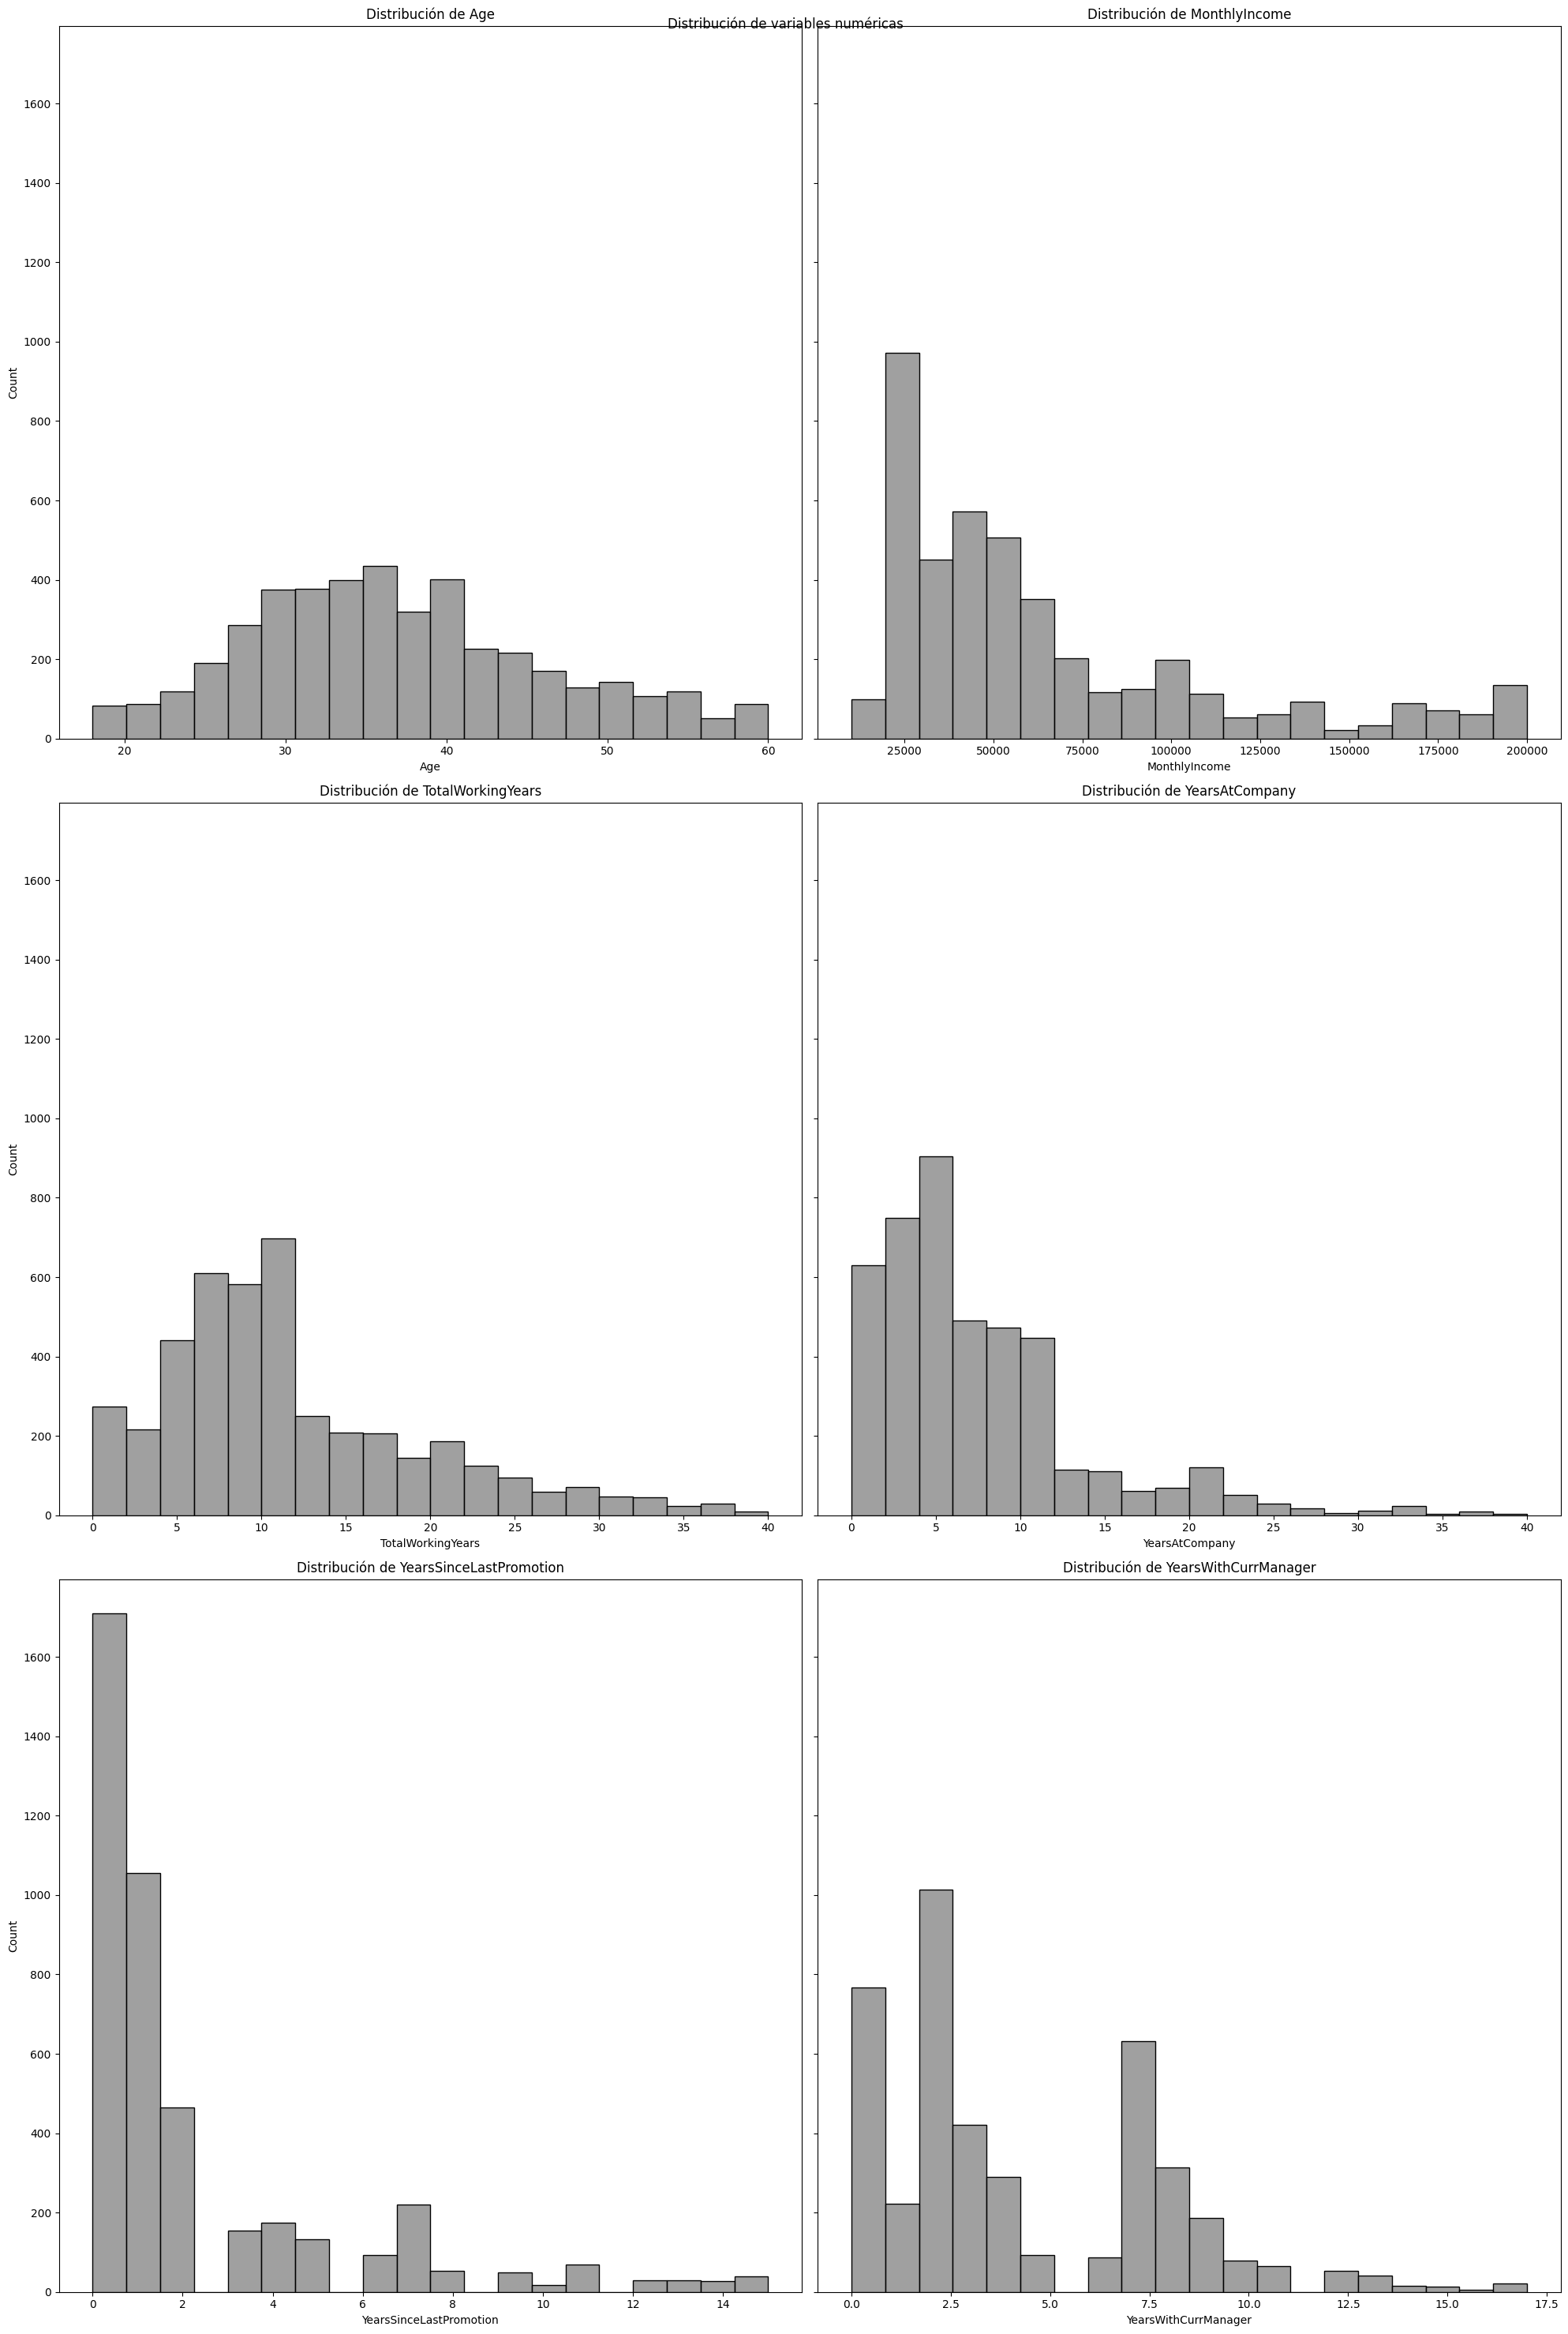

In [33]:
visualizar.plot_numericas(tamano_grafica=(20,30))

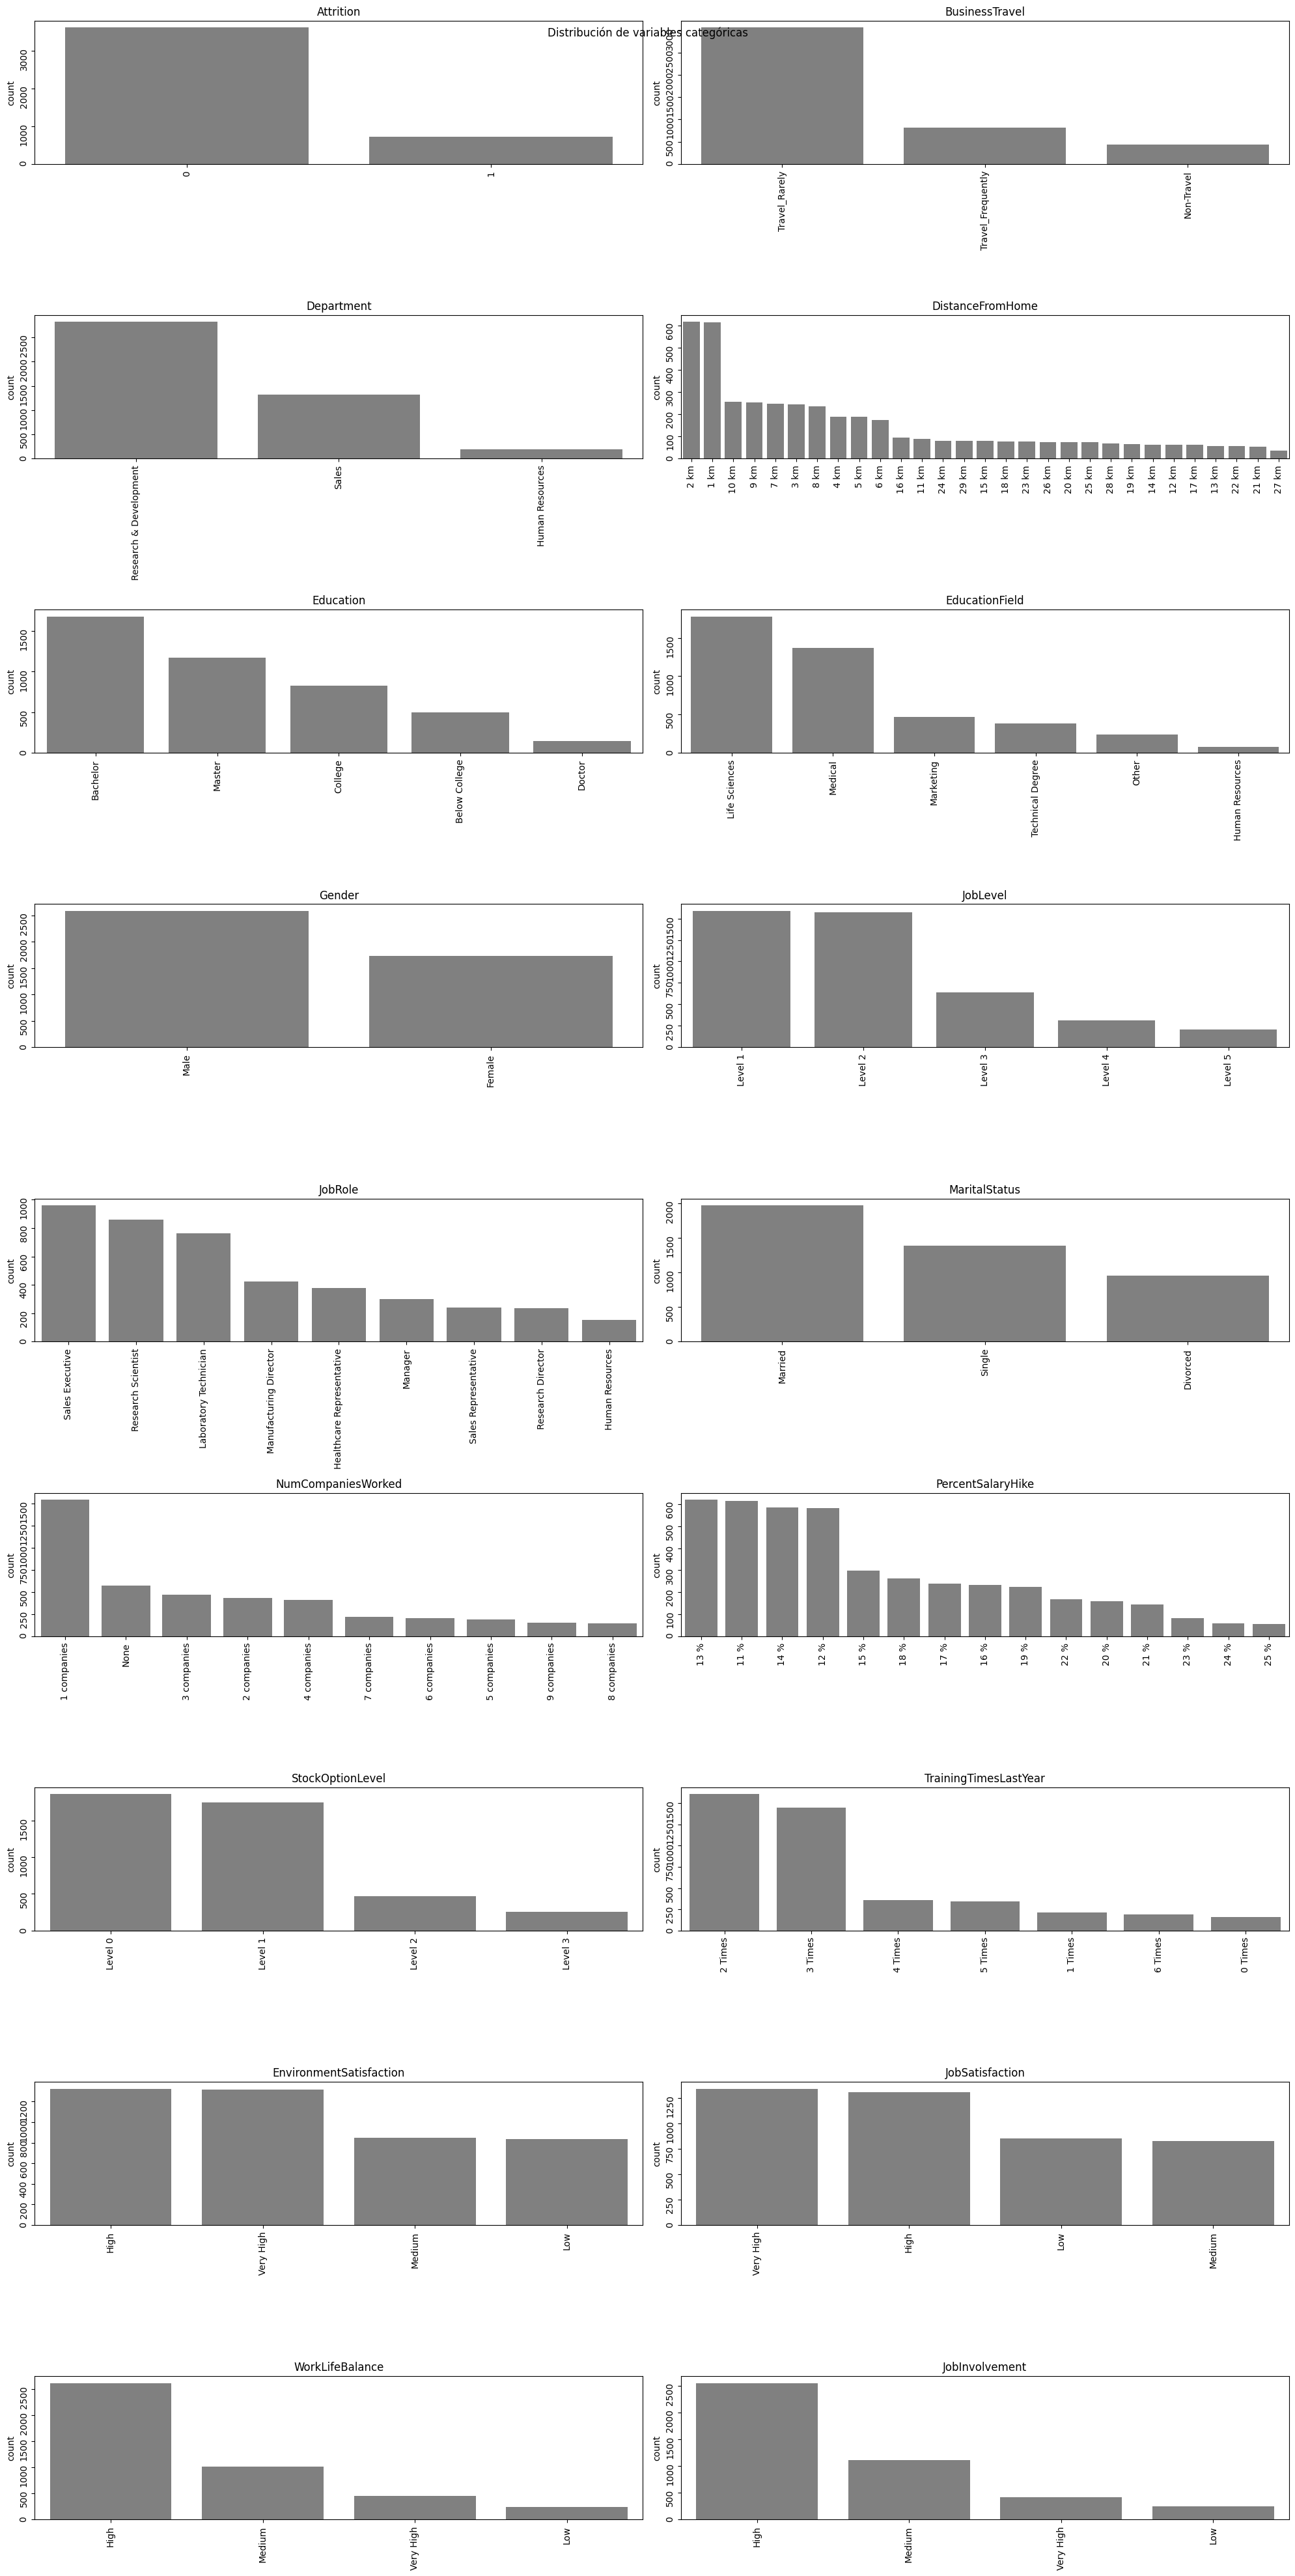

In [34]:
visualizar.plot_categoricas(tamano_grafica=(20,40))

# Outliers

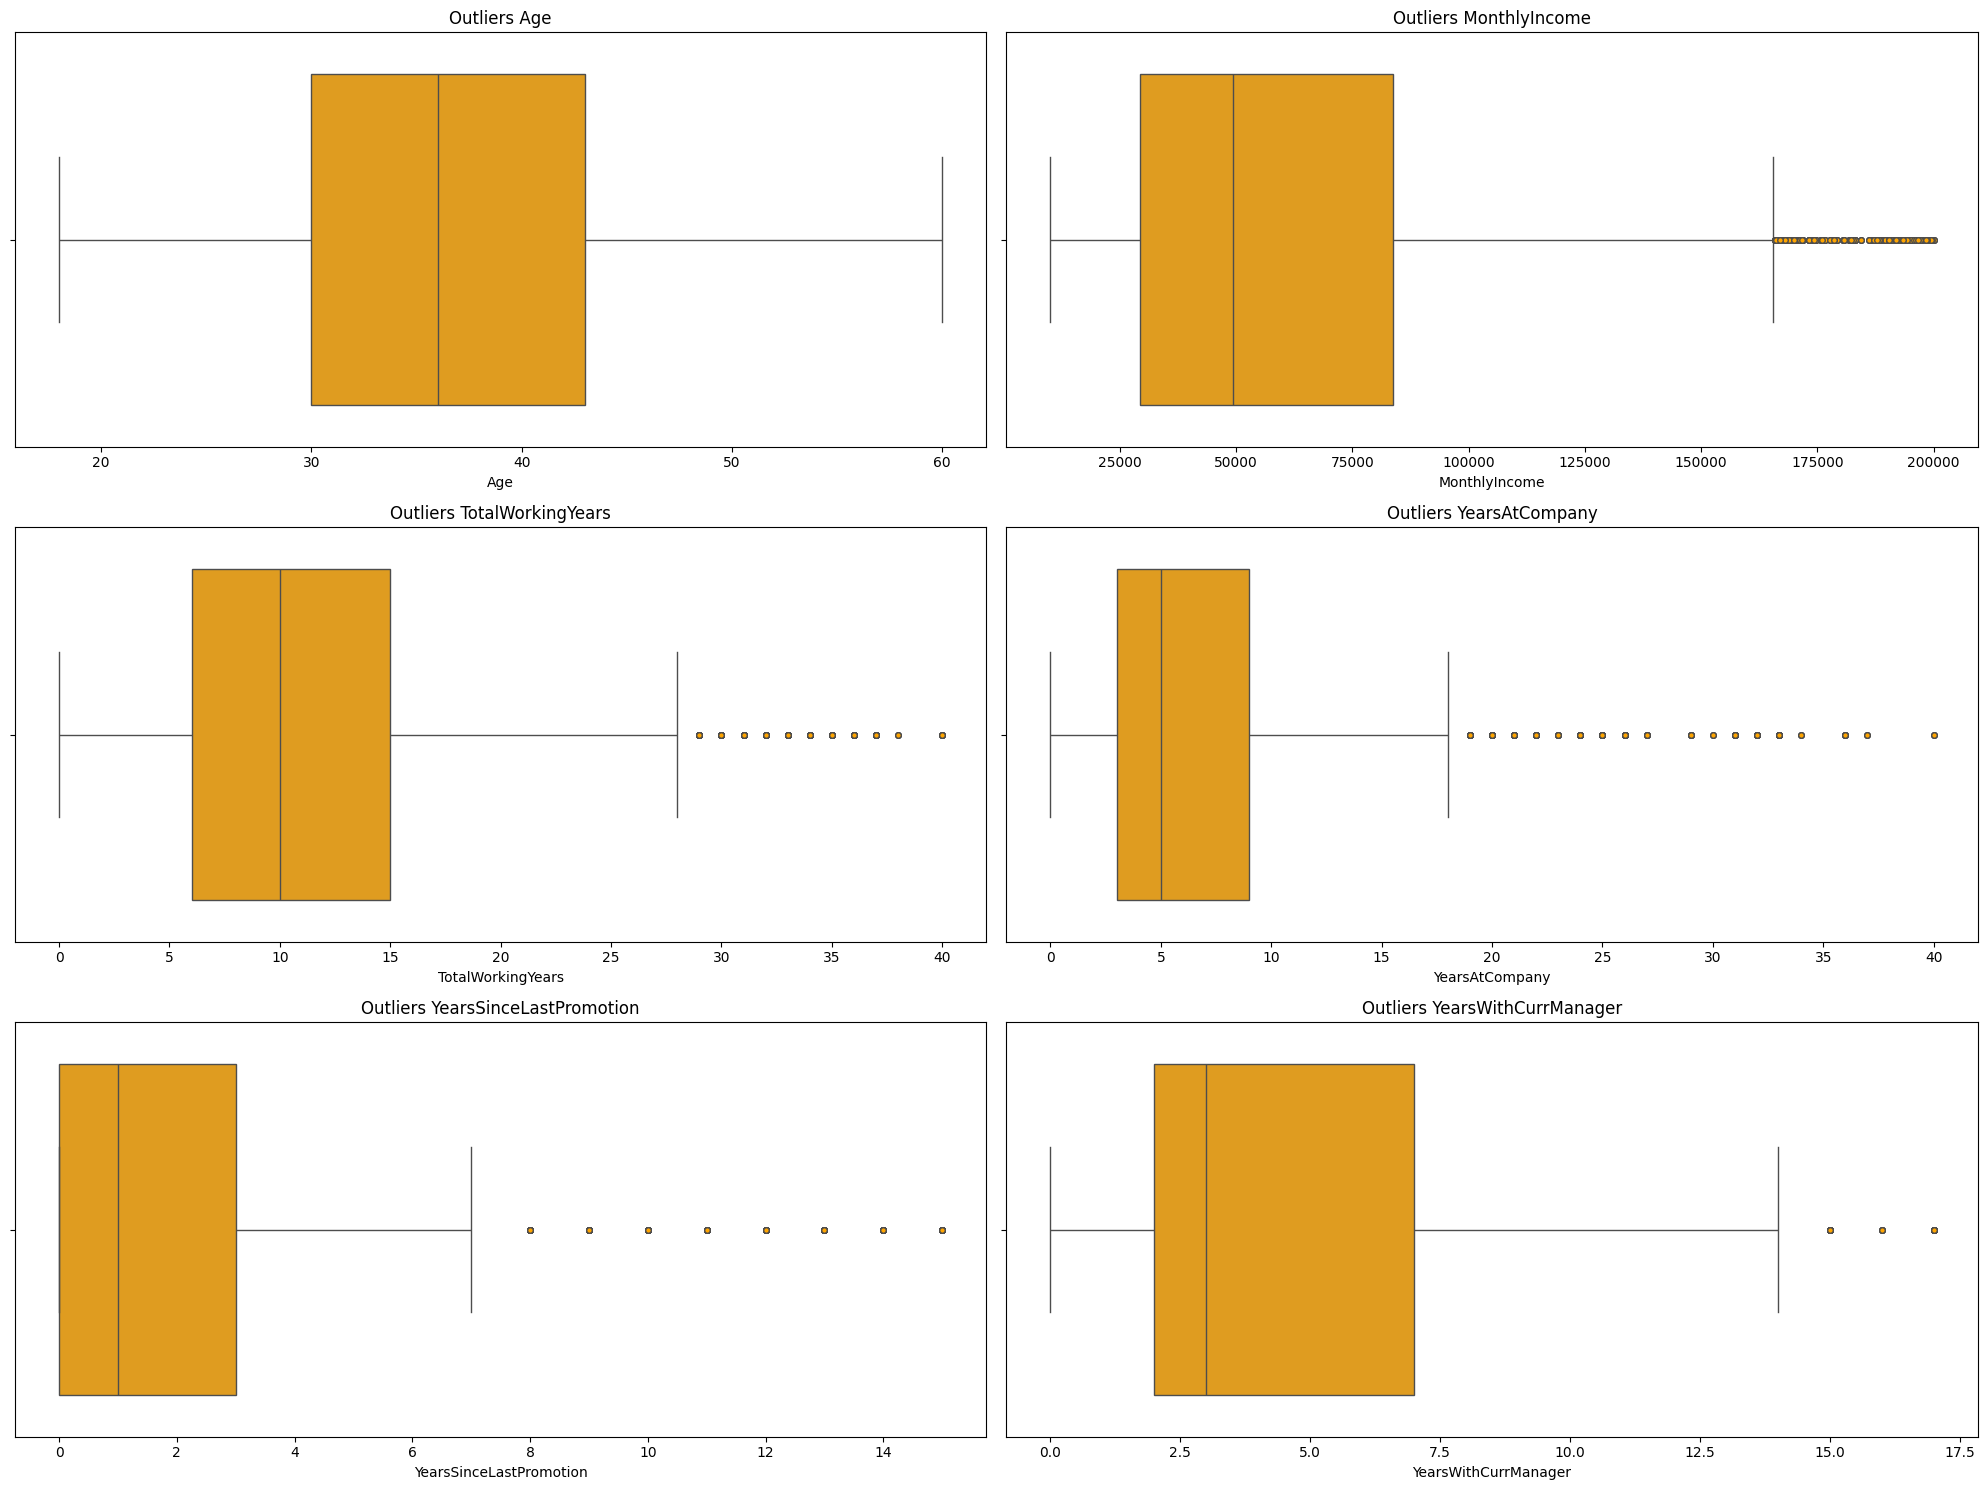

In [35]:
# detectamos los outliers
visualizar.deteccion_outliers(color = "orange",tamano_grafica=(20,15))

# Conclusiones
Outliers en:
- MonthlyIncome 
- NumCompaniesWorked
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsSinceLastPromotion
- YearsWithCurrManager

# Correlación

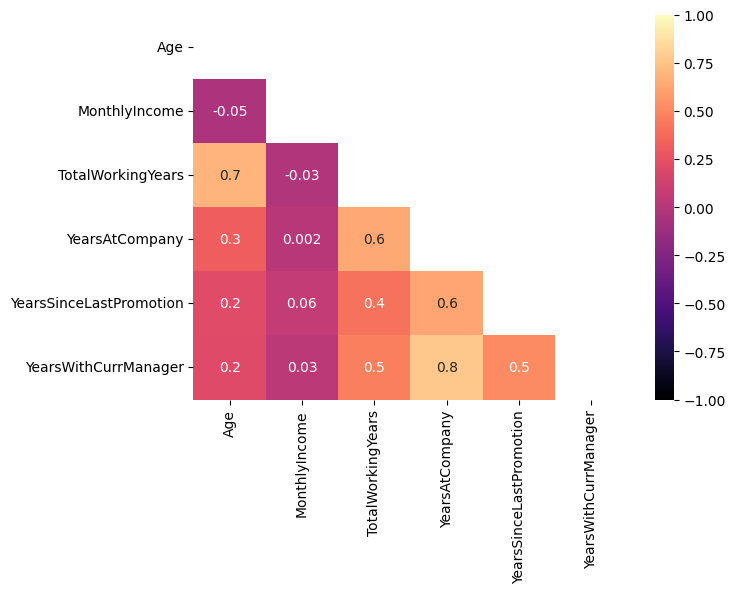

In [36]:
# evaluamos las correlaciones entre las variables numéricas
visualizar.correlacion()

 Mejor la hacemos luego

# Relacion entre variables numéricas

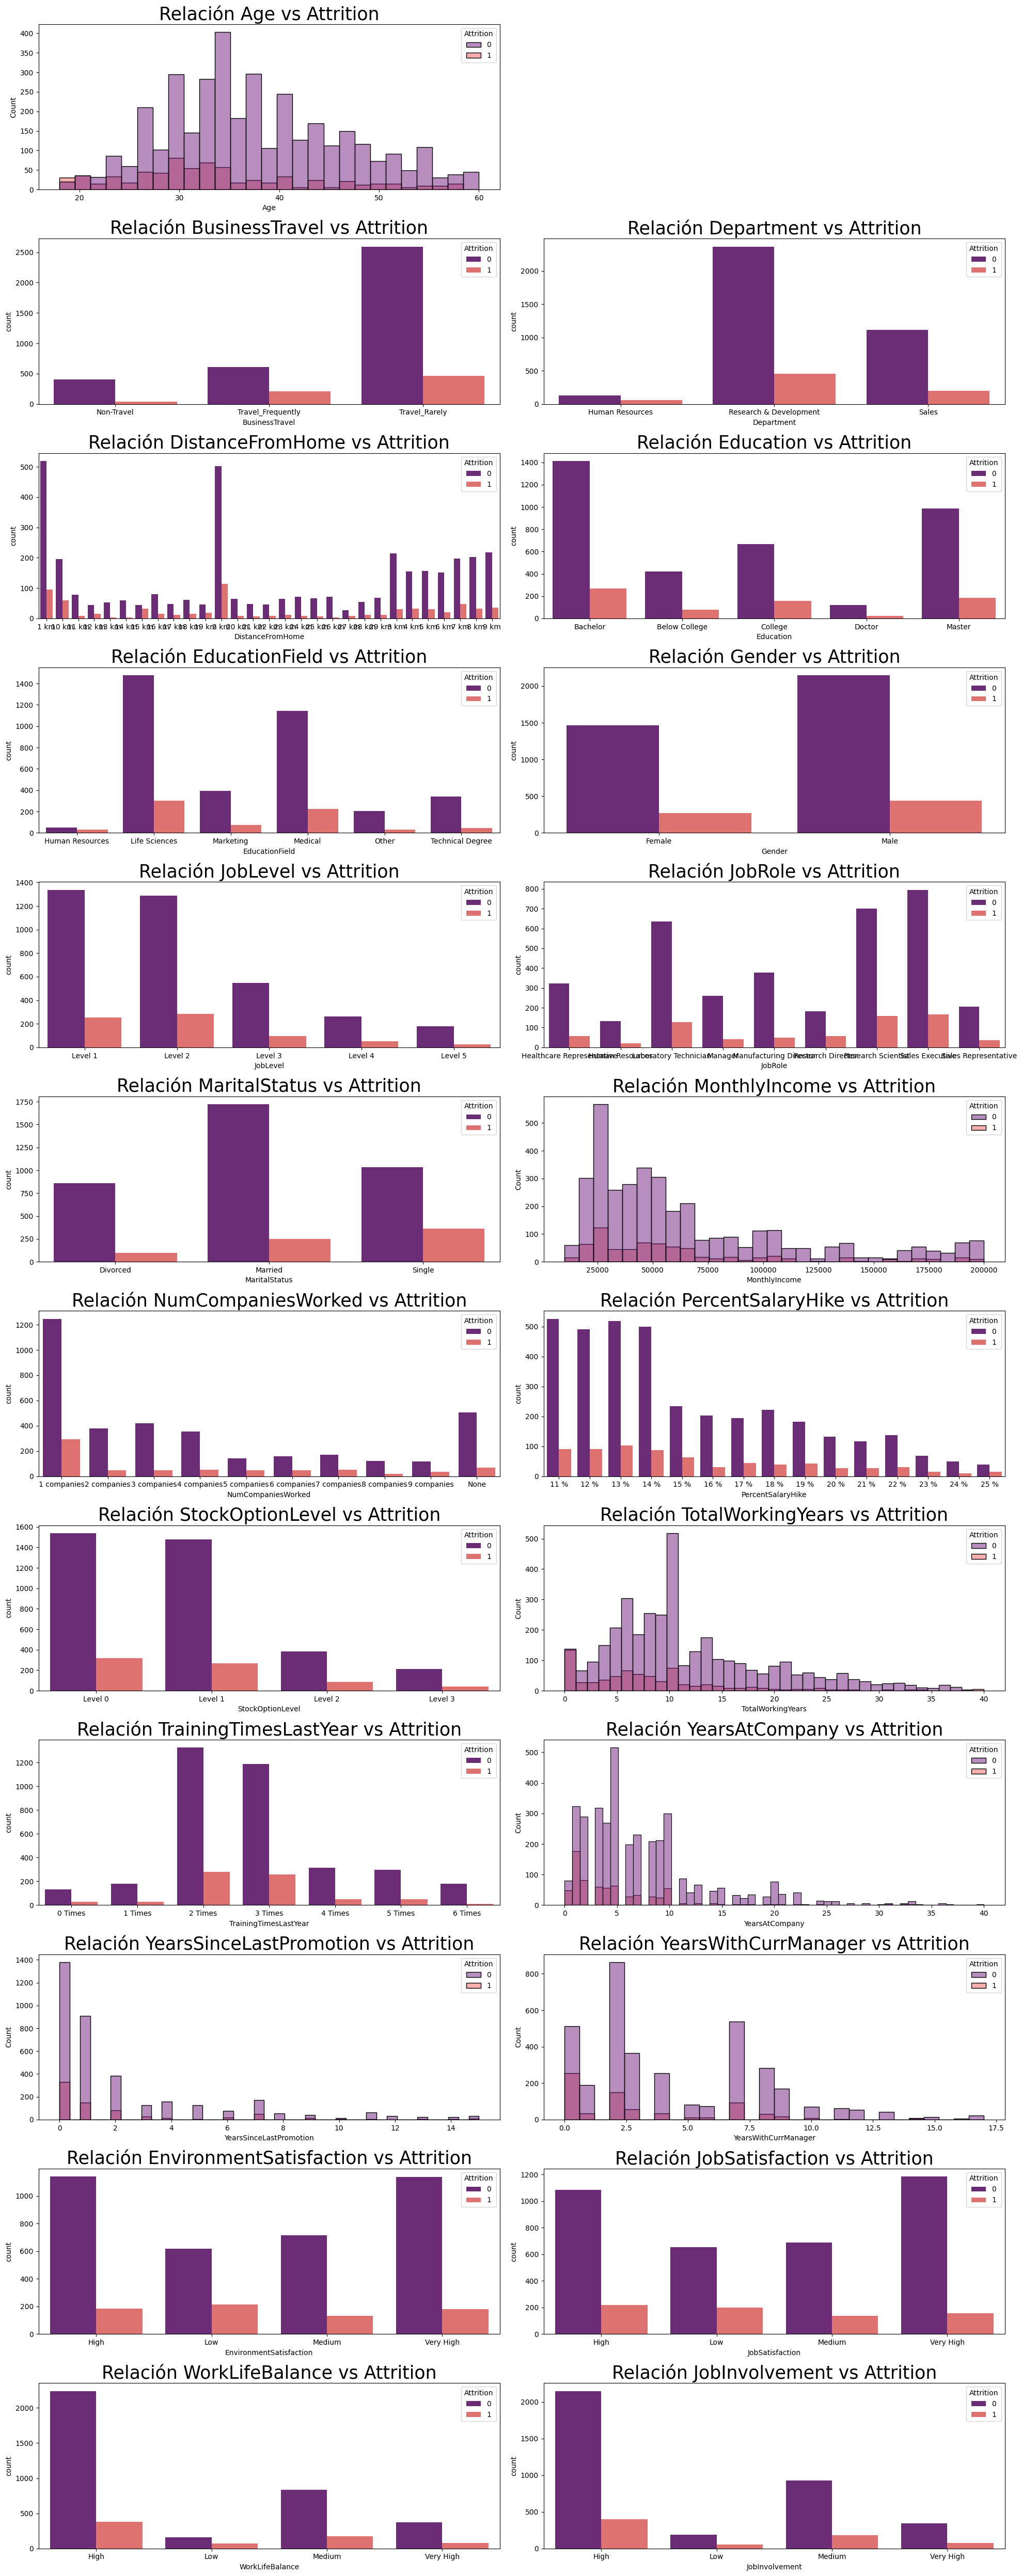

In [37]:
visualizar.plot_relacion("Attrition",tamano_grafica=(20,50))